In [1]:
from pathlib import Path
import os
import sisl
import sisl.viz
import numpy as np
from ase.build import molecule

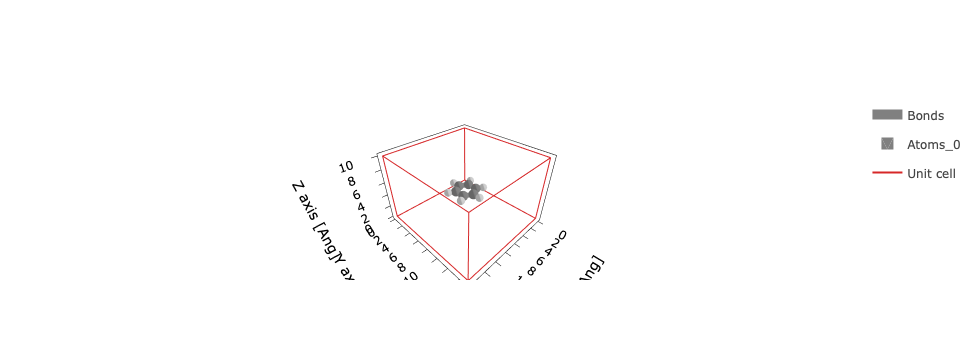

In [7]:
atoms = molecule('C6H6', vacuum = 5)
benzene = sisl.Geometry.new(atoms)
benzene.plot(axes='xyz')

In [8]:
inputs = Path('inputs')
results = Path('results')
siesta = '/opt/anaconda3/envs/sisl/bin/siesta'

In [12]:
benzene.write(inputs/'geom.fdf')

In [16]:
with open(inputs/'RUN.fdf', 'w') as f:
    f.write('%include geom.fdf \n')
    f.write('TS.HS.Save true')

In [18]:
os.system(f'cd {results}; {siesta} RUN.fdf > RUN.out')

Job completed


0

In [20]:
H = sisl.get_sile(results/"RUN.fdf").read_hamiltonian()

In [24]:
eigenstates = H.eigenstate()
eigenstates.eig

array([-16.85580708, -14.08557077, -14.08556961, -10.53065   ,
       -10.53050014,  -8.6568716 ,  -6.88631903,  -6.6670582 ,
        -5.94715145,  -5.94655915,  -4.76289237,  -3.94743687,
        -3.94717947,  -2.03364036,  -2.03352947,   3.17043911,
         3.17047605,   6.11506811,   7.11142409,   7.63007991,
         7.63109235,   8.40584879,   8.40588814,   9.16188362,
        11.24462581,  11.24520437,  11.43577246,  11.43619308,
        11.82273651,  12.22036252,  12.44681007,  14.53395665,
        14.53408313,  15.05258369,  15.05308479,  15.49877627,
        16.05287935,  16.05466305,  16.98881342,  17.2433017 ,
        17.47770491,  17.47776809,  18.0462295 ,  19.2699943 ,
        19.89853275,  21.96333883,  21.96480808,  22.0653772 ,
        22.06782446,  22.08882393,  22.08904605,  23.82263949,
        23.82266747,  24.69047772,  24.94044365,  24.94332067,
        25.92436767,  26.86336758,  26.86667511,  27.2129112 ,
        27.50889385,  28.22180404,  28.2260395 ,  29.59

In [33]:
grid = sisl.Grid((100, 100, 100), geometry=benzene)

wavefunctions = []

for eigenstates in eigenstates:
    wf = sisl.psi(eigenstates.eig, grid)
    wavefunctions.append(wf)

wavefunctions

AttributeError: module 'sisl' has no attribute 'psi'